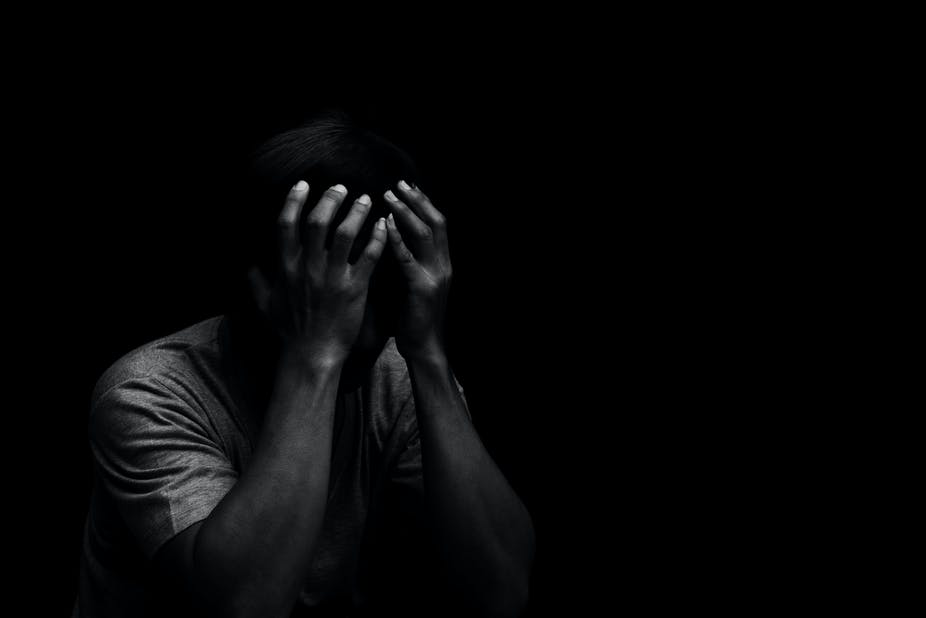

# Libraries

In [1]:
# libraries 
import matplotlib.pyplot as plt
import seaborn as srn
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import*
from sklearn.model_selection import train_test_split

# Data gathering and visulaization

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [3]:
df=pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
print('shape of the dataframe is :',df.shape)

shape of the dataframe is : (27820, 12)


Data is large in size and can be predicted through Regression

In [5]:
for i in df.columns:
    print(i,end=", ")

country, year, sex, age, suicides_no, population, suicides/100k pop, country-year, HDI for year,  gdp_for_year ($) , gdp_per_capita ($), generation, 

# Pre-processing

* Leakage checking (if any)
* Leakage filling (if any)
* Unnecessary column or row deletion (if any)

In [6]:
# leakage checking

lk_dat=df.isnull()
for col in df.columns:
    print('leakage in '+col+' is :',len(lk_dat[lk_dat[col]==True]))

leakage in country is : 0
leakage in year is : 0
leakage in sex is : 0
leakage in age is : 0
leakage in suicides_no is : 0
leakage in population is : 0
leakage in suicides/100k pop is : 0
leakage in country-year is : 0
leakage in HDI for year is : 19456
leakage in  gdp_for_year ($)  is : 0
leakage in gdp_per_capita ($) is : 0
leakage in generation is : 0


The HDI column hold (19456 / 27820) * 100 = 69.9352 % of leakage in a single column.

So we are going to take a dummy datset and the this from there and predcit both and see which have more accuracy. Before doing pipeline we'll create that dummy dataframe 

In [7]:
# filling the leakage

df.replace(np.NaN,-99999.0,inplace=True)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,-99999.000,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,-99999.000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,-99999.000,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,-99999.000,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,-99999.000,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


# Feature Engineering

The country-year column looks unnecessary as the data is also present in 2 other columns. we are drpoping it.

In [8]:
df.drop('country-year',1,inplace=True)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,-99999.000,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,-99999.000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,-99999.000,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,-99999.000,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,-99999.000,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


The age column is a categorical data .


In [9]:
age=[]
for i in df['age']:
    age.append(i[:-6])
df['age'].value_counts()

25-34 years    4642
15-24 years    4642
35-54 years    4642
75+ years      4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

It is visible it has 6 different types.

In [10]:
age=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']

In [11]:
k=0
for i in age:
    df['age'].replace(i,k,inplace=True)
    k+=1
df['age']

0        1
1        3
2        1
3        5
4        2
        ..
27815    3
27816    5
27817    0
27818    0
27819    4
Name: age, Length: 27820, dtype: int64

Encoding other columns too

In [12]:
#  function to turn categorical data into numerical data

def non_num_data(df):
    columns=df.columns.values
    
    for column in columns:
        text_digit_vals={}
        def con_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype!=np.int64 and df[column].dtype!=np.float64:
            column_contents=df[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
            df[column]=list(map(con_to_int,df[column]))
    return df

In [13]:
non_num_data(df)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,68,1987,1,1,21,312900,6.71,-99999.000,1786,796,4
1,68,1987,1,3,16,308000,5.19,-99999.000,1786,796,0
2,68,1987,0,1,14,289700,4.83,-99999.000,1786,796,4
3,68,1987,1,5,1,21800,4.59,-99999.000,1786,796,2
4,68,1987,1,2,9,274300,3.28,-99999.000,1786,796,5
...,...,...,...,...,...,...,...,...,...,...,...
27815,16,2014,0,3,107,3620833,2.96,0.675,1991,2309,4
27816,16,2014,0,5,9,348465,2.58,0.675,1991,2309,0
27817,16,2014,1,0,60,2762158,2.17,0.675,1991,2309,3
27818,16,2014,0,0,44,2631600,1.67,0.675,1991,2309,3


# Pipelines

Creating X and Y for the data

In [14]:
X_df=df.drop('suicides_no',1)
y_df=df['suicides_no']

In [15]:
print(X_df.shape,y_df.shape)

(27820, 10) (27820,)


* Re-shuffling the data

In [16]:
df=df.sample(frac=1)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
502,12,2006,1,4,0,3847,0.00,-99999.000,2040,14114,0
18234,26,2009,0,3,0,197737,0.00,-99999.000,1207,18557,5
22519,21,1994,1,0,1,223300,0.45,-99999.000,1095,27202,1
19391,22,1987,0,0,2,787188,0.25,-99999.000,95,5138,4
26636,10,1998,1,1,382,3673423,10.40,-99999.000,1837,29508,4
...,...,...,...,...,...,...,...,...,...,...,...
3734,85,2009,1,1,90,661817,13.60,-99999.000,1545,47630,1
19909,70,2004,1,3,101,449605,22.46,-99999.000,789,22874,5
16965,55,2001,1,2,0,43146,0.00,-99999.000,810,2004,4
13102,80,2011,1,3,1137,9024678,12.60,0.873,1436,40210,4


* train-test split 

As the data is large   a 70-30 train-test split is good for prediction

In [17]:

X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19474, 10) (8346, 10) (19474,) (8346,)


Regression models

LinearRegression

In [18]:

model=linear_model.LinearRegression()
model.fit(X_train,y_train)
print('accuracy of linearregression : ',model.score(X_train,y_train))
y_pr1=model.predict(X_test)
print('MSE of the data using Linear Regression : ',mean_squared_error(y_test,y_pr1))
print('r-squared error of the data using Linear Regression : ',1-r2_score(y_test,y_pr1))
print('RMSE of the data using Linear Regression : ',np.sqrt(mean_squared_error(y_test,y_pr1)))

accuracy of linearregression :  0.4665927573555566
MSE of the data using Linear Regression :  390850.2769174784
r-squared error of the data using Linear Regression :  0.5075984657100057
RMSE of the data using Linear Regression :  625.1801955576316


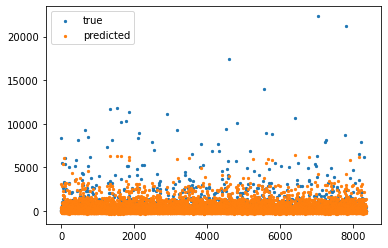

In [19]:
a=np.arange(1,len(y_test)+1,1)
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_pr1,label='predicted',s=5)
plt.legend()
plt.show()

Randomforestregressor

In [20]:

model=RandomForestRegressor()
model.fit(X_train,y_train)
print('accuracy of randomforestregression : ',model.score(X_train,y_train))
y_pr1=model.predict(X_test)
print('MSE of the data using randomforestregression : ',mean_squared_error(y_test,y_pr1))
print('r-squared error of the data using randomforestregression : ',1-r2_score(y_test,y_pr1))
print('RMSE of the data using randomforestregression : ',np.sqrt(mean_squared_error(y_test,y_pr1)))

accuracy of randomforestregression :  0.9993529247825503
MSE of the data using randomforestregression :  2047.4903522645566
r-squared error of the data using randomforestregression :  0.0026590820647799385
RMSE of the data using randomforestregression :  45.24920278043091


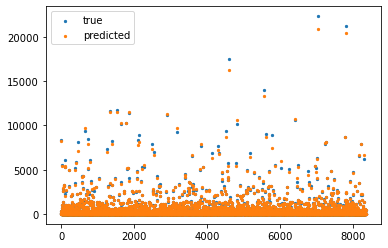

In [21]:
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_pr1,label='predicted',s=5)
plt.legend()
plt.show()

RandomForestRegressor showed huge accuracy over the model.

Previously we decided to predict the model after droping the HDI column. 

we are going to execute that now.

In [22]:
X_trr=X_train.drop('HDI for year',1)
X_ter=X_test.drop('HDI for year',1)

In [23]:
model.fit(X_trr,y_train)
print('accuracy of randomforestregression : ',model.score(X_trr,y_train))
y_pr1=model.predict(X_ter)
print('MSE of the data using randomforestregression : ',mean_squared_error(y_test,y_pr1))
print('r-squared error of the data using randomforestregression : ',1-r2_score(y_test,y_pr1))
print('RMSE of the data using randomforestregression : ',np.sqrt(mean_squared_error(y_test,y_pr1)))

accuracy of randomforestregression :  0.9993488247912955
MSE of the data using randomforestregression :  1881.9470381739752
r-squared error of the data using randomforestregression :  0.0024440904498227445
RMSE of the data using randomforestregression :  43.38141351055744


Surely it shows that droping that 'HDI for year' column increases the accuracy of the model and it concludes that heavy leakage may mislead the data and omitting that in a huge dataset might help you gain higher accuracy

# UPVOTE if you like this EDA  :)

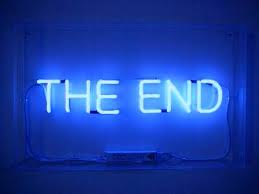